# Regression between sea level height and the nearest wind stress data point

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [24]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs
from code import practical_functions as pf

data_type = 'era5'
station_names = pf.station_names()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [2]:
# Open data file
tg_data = imprt.import_obs_slh_data()

In [3]:
tg_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
time,,,,,,,
1890,-13.213259,-14.166181,-8.973137,-13.026188,-9.377363,-15.171036,-12.321191
1891,-16.183386,-13.841866,-5.759001,-10.815760,-7.565391,-11.451732,-10.936208
1892,-16.236881,-10.900375,-5.826693,-10.986799,-6.835037,-8.314762,-9.850130
1893,-13.756411,-11.823811,-3.957280,-6.719991,-5.267145,-3.741717,-7.544446
1894,-8.928481,-12.998235,-4.236016,-10.100298,-4.946798,-4.318264,-7.588078
...,...,...,...,...,...,...,...
2015,15.157874,19.020343,14.241575,20.498794,17.143344,15.329365,16.898612
2016,15.472328,19.235269,12.357366,17.014900,13.459319,14.644716,15.364048
2017,17.029377,21.390915,16.210442,22.767040,18.011848,17.599097,18.834846


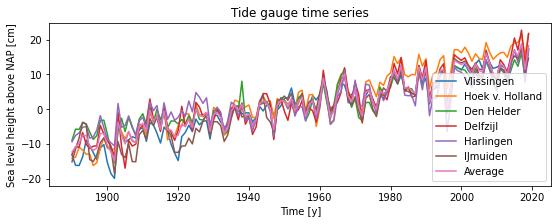

In [4]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [5]:
wind_data = imprt.import_obs_wind_data(model = 'Nearest Point', data_type)

In [6]:
wind_data

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1950,4.733644,6.345675,9.164554,2.814705,7.602190,7.574831,6.372600,2.731458,3.180596,3.728501,1.950656,3.185383,3.380980,3.026262
1951,2.215220,3.094227,5.129766,1.345894,4.254703,3.909268,3.324846,4.189133,4.875644,6.217201,2.589350,4.982398,5.261225,4.685825
1952,3.140214,4.201388,7.262647,2.741641,6.585569,5.366155,4.882936,0.754191,0.748247,0.540864,0.799019,0.620607,0.670609,0.688923
1953,2.692977,3.829823,6.808114,2.271224,5.938963,4.985612,4.421119,1.657496,1.953852,2.634877,1.285330,2.170539,2.212620,1.985786
1954,8.065403,10.580028,14.525902,3.746828,11.332446,12.414601,10.110868,1.852473,2.051144,2.859851,2.389015,2.856825,2.352618,2.393654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2.870005,3.364094,4.651558,1.689992,4.181081,3.813334,3.428344,1.896073,2.166514,2.891788,1.476865,2.518330,2.388465,2.223006
2017,5.444768,7.589746,12.106847,3.815765,9.986858,9.524419,8.078067,1.284091,1.384115,1.738423,1.651508,1.608859,1.481535,1.524755


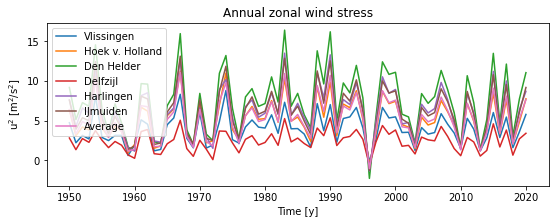

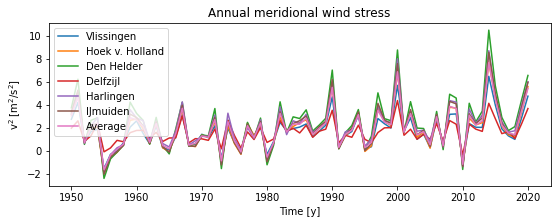

In [7]:
figs.plot_obs_wind_data(wind_data)

### Perform regression

In [18]:
results, timeseries = regres.regression_obs(wind_data, tg_data, model = 'NearestPoint')

In [19]:
results

,R$^2$,RMSE,Constant,u$^2$,v$^2$,trend
station,,,,,,
Vlissingen,-31.221267,2.428682,7.432840,1.416112,0.155899,3.951312
Hoek v. Holland,-22.708270,2.296615,10.099787,2.404671,-0.316011,5.682024
Den Helder,-7.447890,2.410949,6.437163,2.464924,0.136922,3.562110
Delfzijl,-8.694081,2.625642,7.702764,2.839116,0.131241,4.931763
Harlingen,-3.871922,2.631931,5.900536,2.969768,0.263950,3.402462
IJmuiden,-14.400552,2.591322,7.258273,1.990347,0.243336,3.794930
Average,-11.631528,2.157774,7.472407,2.363966,0.064965,4.230608


In [63]:
timeseries

Vlissingen                                                      \
       Constant     u$^2$     v$^2$     trend      Total Wind total   
time                                                                  
1950    7.43284  0.590414  0.109795 -6.748150   1.384900   0.700210   
1951    7.43284 -1.269362  0.266152 -6.555346  -0.125716  -1.003211   
1952    7.43284 -0.586283 -0.102295 -6.362542   0.381721  -0.688578   
1953    7.43284 -0.916554 -0.005402 -6.169737   0.341147  -0.921956   
1954    7.43284  3.050812  0.015512 -5.976933   4.522231   3.066324   
...         ...       ...       ...       ...        ...        ...   
2016    7.43284 -0.785824  0.020188  5.976933  12.644138  -0.765636   
2017    7.43284  1.115557 -0.045455  6.169737  14.672679   1.070102   
2018    7.43284 -1.722034 -0.078360  6.362542  11.994988  -1.800394   
2019    7.43284 -0.244998  0.117192  6.555346  13.860381  -0.127806   
2020    7.43284  1.360473  0.325265  6.748150  15.866728   1.685738   

     Hoek v. Holland                                ...  IJmuiden            \
            Constant     u$^2$     v$^2$     trend  ...     v$^2$     trend   
time                                                ...                       
1950       10.099787  1.102852 -0.227150 -9.703903  ...  0.162680 -6.481078   
1951       10.099787 -1.922732 -0.529829 -9.426648  ...  0.397195 -6.295904   
1952       10.099787 -0.892481  0.207185 -9.149394  ... -0.175374 -6.110730   
1953       10.099787 -1.238235 -0.008095 -8.872140  ...  0.016955 -5.925557   
1954       10.099787  5.043063 -0.025468 -8.594885  ...  0.034416 -5.740383   
...              ...       ...       ...       ...  ...       ...       ...   
2016       10.099787 -1.671612 -0.046069  8.594885  ...  0.038888  5.740383   
2017       10.099787  2.260503  0.093641  8.872140  ... -0.074230  5.925557   
2018       10.099787 -2.847268  0.132941  9.149394  ... -0.091445  6.110730   
2019       10.099787 -0.292829 -0.249328  9.426648  ...  0.202563  6.295904   
2020       10.099787  2.399710 -0.655817  9.703903  ...  0.482872  6.481078   

                             Average                                           \
          Total Wind total  Constant     u$^2$     v$^2$     trend      Total   
time                                                                            
1950   1.861906   1.084711  7.472407  1.048559  0.040000 -7.225138   1.335827   
1951  -0.063071  -1.025441  7.472407 -1.696519  0.103430 -7.018706  -1.139388   
1952   0.481427  -0.666116  7.472407 -0.293165 -0.049335 -6.812273   0.317633   
1953   0.615517  -0.717200  7.472407 -0.709118  0.000232 -6.605841   0.157680   
1954   5.570083   4.052193  7.472407  4.415575  0.015821 -6.399408   5.504394   
...         ...        ...       ...       ...       ...       ...        ...   
2016  11.553544  -1.445112  7.472407 -1.603300  0.009299  6.399408  12.277814   
2017  15.278679   2.094849  7.472407  2.584654 -0.017389  6.605841  16.645512   
2018  10.978903  -2.390101  7.472407 -2.823249 -0.022502  6.812273  11.438929   
2019  13.706804   0.152627  7.472407  0.012916  0.054137  7.018706  14.558166   
2020  16.160746   2.421395  7.472407  2.183802  0.131172  7.225138  17.012518   

                 
     Wind total  
time             
1950   1.088559  
1951  -1.593089  
1952  -0.342500  
1953  -0.708886  
1954   4.431396  
...         ...  
2016  -1.594001  
2017   2.567265  
2018  -2.845751  
2019   0.067053  
2020   2.314974  

[71 rows x 42 columns]

#### Plot results

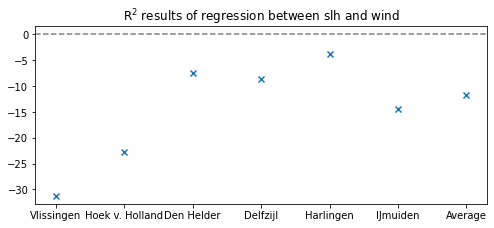

In [61]:
figs.plot_obs_result_per_station(results, 'R$^2$', data_type)

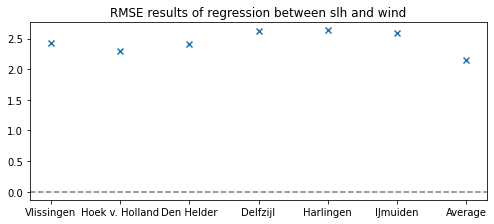

In [62]:
figs.plot_obs_result_per_station(results, 'RMSE', data_type)

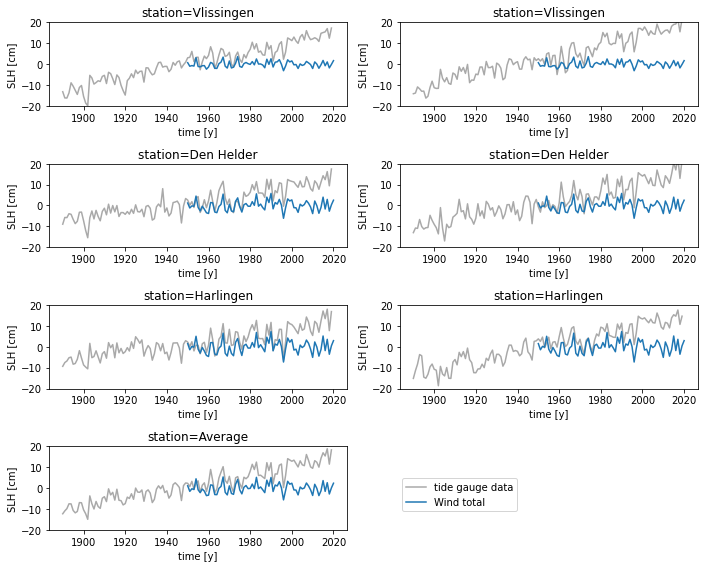

In [79]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries)

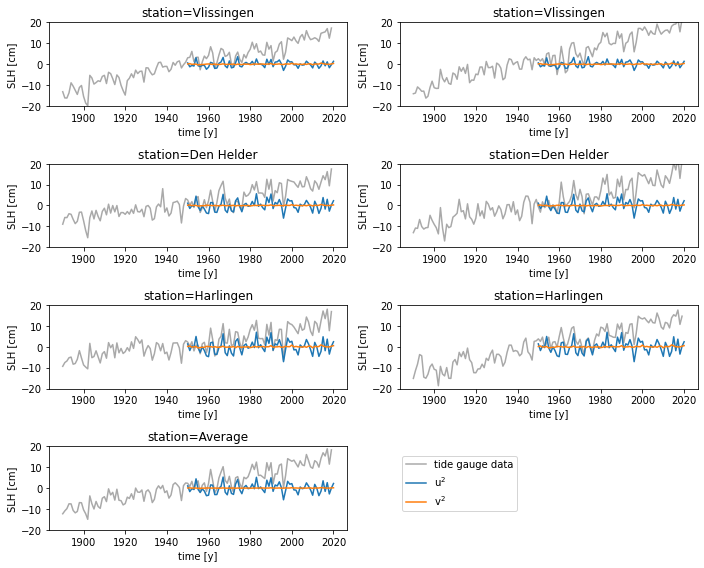

In [80]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, var=['u$^2$', 'v$^2$'])

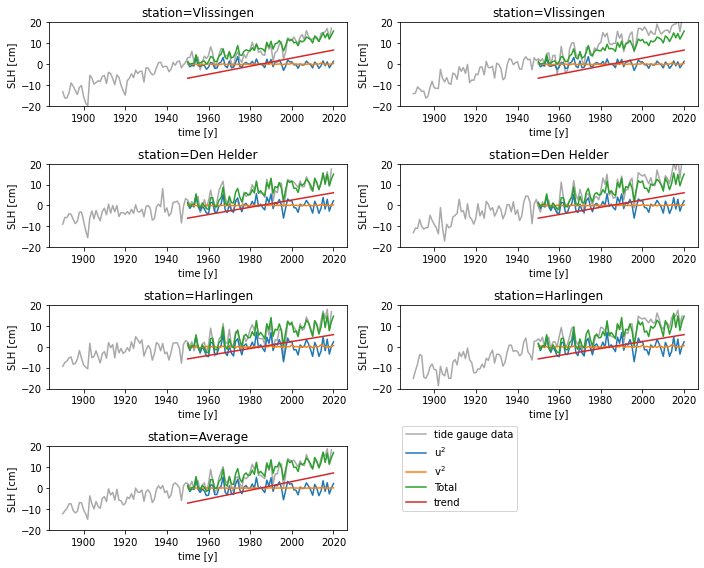

In [82]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, var=['u$^2$', 'v$^2$', 'Total', 'trend'])